In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
train = pd.read_csv('titanic_train.csv')

In [40]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:>

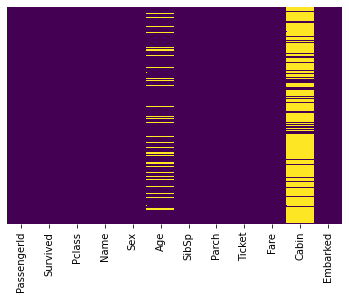

In [9]:
#to see where are we missing most of the data
sns.heatmap(train.isnull() , yticklabels=False , cbar = False , cmap = 'viridis')

Text(0.5, 0, 'male and female survived')

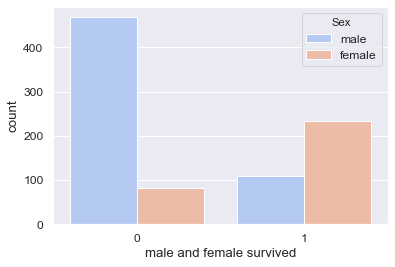

In [29]:
sns.set_context('notebook',font_scale=1.1)
sns.set_style('darkgrid')
sns.countplot(x= 'Survived', data = train , hue = 'Sex' , palette='coolwarm')
plt.xlabel("male and female survived")


<AxesSubplot:xlabel='Survived', ylabel='count'>

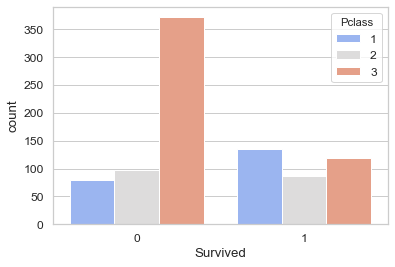

In [33]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', data = train  , hue = 'Pclass', palette='coolwarm')

<AxesSubplot:xlabel='Age'>

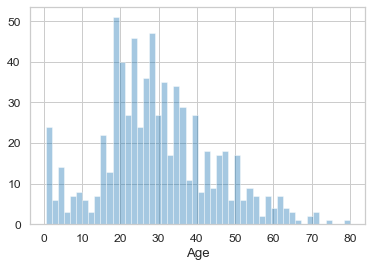

In [38]:
sns.distplot(train['Age'].dropna() , kde = False , bins = 50 ,)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<AxesSubplot:>

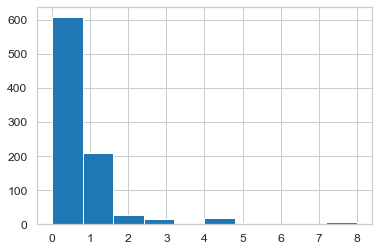

In [41]:
train['SibSp'].hist()

<AxesSubplot:>

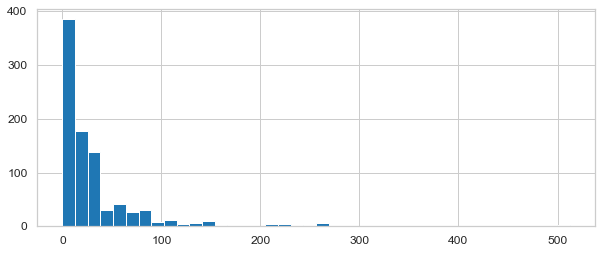

In [42]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [55]:
train[['Age',"Pclass"]].head(10)

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


<AxesSubplot:>

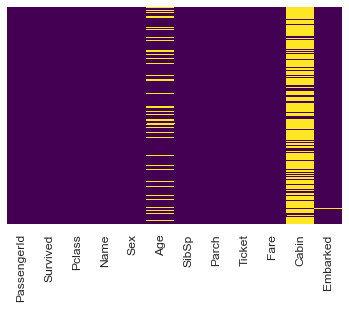

In [72]:
sns.heatmap(train.isnull(), cmap= 'viridis' , cbar=False , yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

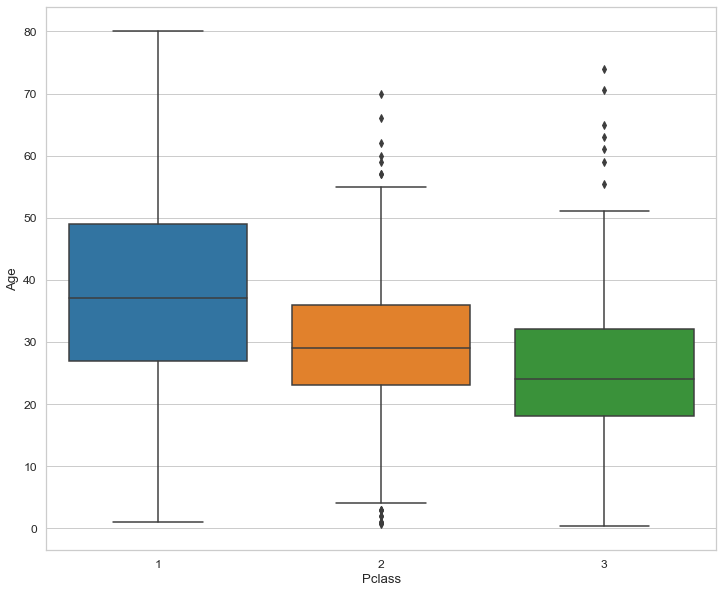

In [73]:
plt.figure(figsize = (12,10))
sns.set_style('whitegrid')
sns.boxplot(data = train, y = 'Age' , x = 'Pclass')

In [74]:
def inpute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        if pclass == 2:
            return 29
        else:
            return 23
    else:
        return age
        

In [75]:
train['Age'] =  train[['Age' , 'Pclass']].apply(inpute_age, axis = 1)

In [77]:
train.drop('Cabin' , axis = 1 , inplace = True)

In [80]:
train.dropna(inplace = True)

<AxesSubplot:>

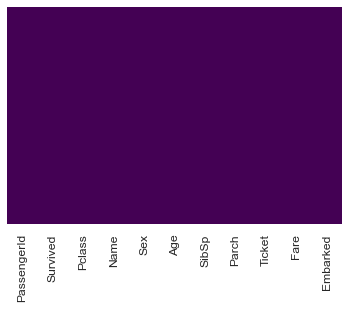

In [82]:
sns.heatmap(train.isnull(), cmap= 'viridis' , cbar=False , yticklabels=False)

In [87]:
sex = pd.get_dummies(train['Sex'], drop_first = True )

In [89]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [90]:
embarked.head(4)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1


In [95]:
train = pd.concat([train,sex,embarked],axis = 1)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [98]:
train.drop(['Sex','Embarked','Name', 'Ticket'] , axis = 1,inplace=True)

In [99]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [118]:
##now training and deploying the model

In [137]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [141]:
from sklearn.linear_model import LogisticRegression

In [146]:
logmodel = LogisticRegression(max_iter=1000)


In [147]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [148]:
predictions = logmodel.predict(X_test)

In [149]:
##generating confussion matrix

In [150]:
from sklearn.metrics import confusion_matrix

In [151]:
confusion_matrix(y_test,predictions)

array([[153,  28],
       [ 24,  62]], dtype=int64)